RIDGE and LASSO 

Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Dataset

In [29]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Cleaning

In [30]:
df = df.drop(columns=["Suburb", "Address", "Method", "SellerG", "Date", "CouncilArea", "Regionname"])
df.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,h,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,h,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,u,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [ ]:
df.dropna(inplace=True)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,True,False,False
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,True,False,False
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,True,False,False
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,True,False,False
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,True,False,False


Encoding "Type"

In [ ]:
#df = pd.get_dummies(df, columns=["Type"], drop_first=False)
df = df.astype({col: int for col in df.select_dtypes(include=["bool"]).columns})

#print(df.columns)
df.head()

Defining  Features(X and Y)

In [40]:
x = df.drop(columns=["Price"])
y = df["Price"]

print(x.head(1))

   Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
2      2       2.5    3067.0       2.0       1.0  0.0     156.0          79.0   

   YearBuilt  Lattitude  Longtitude  Propertycount  Type_h  Type_t  Type_u  
2     1900.0   -37.8079    144.9934         4019.0       1       0       0  


Spliting Dataset

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Standardizing/Scaling

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Training Ridge & Lasso

In [ ]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)

Predictions

In [48]:
ridge_pred = ridge.predict(x_test_scaled)
lasso_pred = lasso.predict(x_test_scaled)

Evaluvations using MSE

In [50]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(ridge_mse)
print(lasso_mse)


133437984630.72546
133443830743.09895


Graph

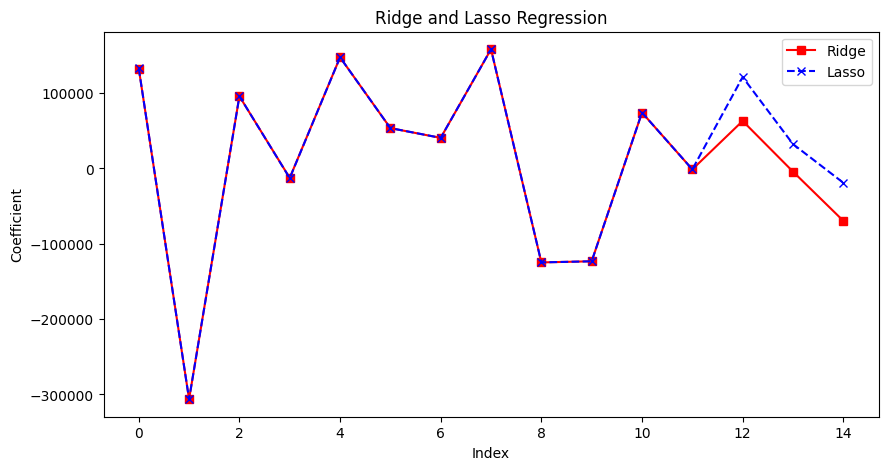

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(ridge.coef_, "s-", color="red",  label="Ridge")
plt.plot(lasso.coef_, "x--", color="blue", label="Lasso")
plt.xlabel("Index")
plt.ylabel("Coefficient")
plt.legend()
plt.title("Ridge and Lasso Regression")
plt.show()